In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/winequality-white.csv', delimiter=';')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Viewing data types of each column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- variable types are fine.
- *quality* does not need to be converted to one-hot encoding since it is y.

Viewing counts per unique value of *quality*.

In [5]:
df['quality'].value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [6]:
df['quality'].value_counts().to_frame().sort_index().style.bar(color='#5fba7d')

,quality
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


<AxesSubplot: >

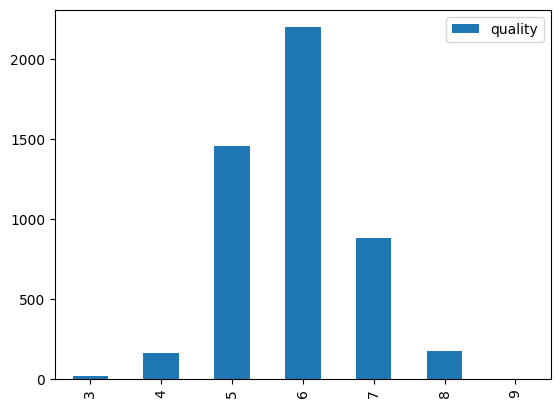

In [7]:
df['quality'].value_counts().sort_index().to_frame().plot(kind='bar')

Data appears to be normally distributed with respect to y (quality labels).

Could consider simplying the values of quality to the following:
- range {3,4,5} = 1 (low quality)
- range {6} = 2 (medium quality)
- range {7,8,9} = 3 (good quality)

In [8]:
df_mod = df.copy()
df_mod['quality'].replace([3,4,5,6,7,8,9],[1,1,1,2,3,3,3], inplace=True)

In [9]:
df_mod['quality'].value_counts().to_frame().sort_index().style.bar()

,quality
1,1640
2,2198
3,1060


<AxesSubplot: >

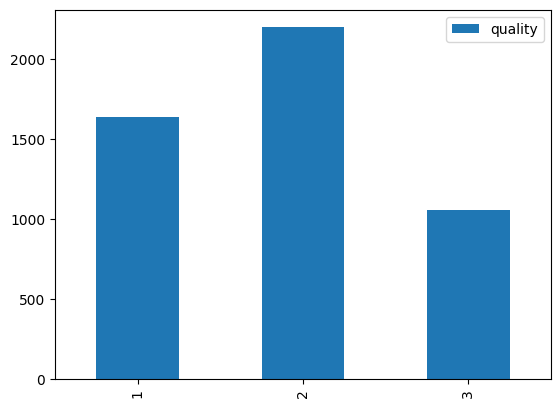

In [10]:
df_mod['quality'].value_counts().sort_index().to_frame().plot(kind='bar')

The quality scores are normalized into a range of {1,2,3} now.

In [11]:
X, y = df_mod.iloc[:,:11], df_mod.iloc[:,11]

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [13]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: quality, dtype: int64

In [14]:
def standardize_data(X, y, test_size=0.30, SEED=0) -> tuple:
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    z = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)
    Xz_train, Xz_test = z.fit_transform(X_train), z.transform(X_test)
    return (Xz_train, Xz_test, y_train, y_test)


In [15]:
Xz_train, Xz_test, y_train, y_test = standardize_data(X, y)

In [16]:
# before standardization
X.iloc[0].to_list()

[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]

In [17]:
# showing x values are in z score form now
Xz_train[0]

array([-0.54987946,  0.10802059,  0.90421574, -0.54833003,  6.81327372,
        2.32630491,  1.04952979,  0.07318938, -1.17885395, -0.95161186,
       -1.16015744])

 ## Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [19]:
SEED = 0

In [87]:
dt_model_1 = DecisionTreeClassifier(criterion='gini', splitter='best',
                        max_depth=None, min_samples_split=2,
                        min_samples_leaf=1, max_features=None,
                        max_leaf_nodes=None, random_state=SEED)

In [88]:
cross_val_score(dt_model_1, Xz_train, y_train, cv=5)

array([0.63119534, 0.59475219, 0.60932945, 0.62919708, 0.62919708])

In [89]:
dt_model_1.fit(Xz_train, y_train)

DecisionTreeClassifier(random_state=0)

In [90]:
depth_level, leave_nodes = dt_model_1.get_depth(), dt_model_1.get_n_leaves()
print(f'For decision tree 1 (hyperparameters printed below), there are {depth_level} depth levels and {leave_nodes} number of leaf nodes.')
dt_model_1.get_params()

For decision tree 1 (hyperparameters printed below), there are 25 depth levels and 790 number of leaf nodes.


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Testing Decision Tree Model 1

In [91]:
y_hat = dt_model_1.predict(Xz_test)

In [92]:
accuracy = dt_model_1.score(Xz_test, y_test)
accuracy

0.6326530612244898

Using GridSearchCV to find best hyperparameters

In [20]:
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X, y, nfolds=5, SEED=SEED):
    #create a dictionary of all hyperparameters and hyperparameter values want to test
    param_grid = {
        'criterion':['gini','entropy'],
        'max_depth': np.arange(10,28),
        'min_samples_split': np.arange(2,11),
        'min_samples_leaf': np.arange(1,4),
        'max_features': np.arange(3,11)
    }
    # decision tree model
    dtree_model=DecisionTreeClassifier(splitter='best', random_state=SEED)
    # use gridsearch to test all hyperparameter values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    # fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [94]:
grid_search = dtree_grid_search(Xz_train, y_train, nfolds=5, SEED=SEED)

In [95]:
grid_search

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

Trying GridSearchCV model hyperparameters

In [96]:
grid_search_dt = DecisionTreeClassifier(criterion='entropy', splitter='best',
                        max_depth=21, min_samples_split=4,
                        min_samples_leaf=1, max_features=6,
                        max_leaf_nodes=None, random_state=SEED)

In [97]:
grid_search_dt.fit(Xz_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features=6,
                       min_samples_split=4, random_state=0)

In [98]:
grid_search_dt_acc = grid_search_dt.score(Xz_test, y_test)

In [99]:
print(f'The highest accuracy achieved on test data is {grid_search_dt_acc} after decision tree hyperparameter tuning with decision trees.')

The highest accuracy achieved on test data is 0.6435374149659864 after decision tree hyperparameter tuning with decision trees.


## Ensemble Model - Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model_1 = RandomForestClassifier(max_depth=None, n_estimators=100,
                                    criterion='gini', max_features='sqrt',
                                    min_samples_split=2, min_samples_leaf=1,
                                    bootstrap=True, random_state=SEED)

In [102]:
rf_model_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [103]:
rf_model_1.fit(Xz_train, y_train)

RandomForestClassifier(random_state=0)

In [104]:
accuracy = rf_model_1.score(Xz_test, y_test)
accuracy

0.6965986394557823

In [23]:
def rforest_grid_search(X, y, nfolds=5, SEED=SEED):
    #create a dictionary of all hyperparameters and hyperparameter values want to test
    param_grid = {
       # 'n_estimators': np.arange(25,125,25),
        #'criterion':['gini','entropy'],
        #'max_depth': np.arange(20,26),
        #'min_samples_split': np.arange(2,6),
        #'min_samples_leaf': np.arange(1,4),
        'max_features': ['sqrt', 'log2', *np.arange(3,7).tolist()],
    }
    # decision tree model
    rforest_model=RandomForestClassifier(max_depth=20, n_estimators=100,
                                         criterion='gini', bootstrap=True,
                                         min_samples_leaf=1,min_samples_split=2,
                                         random_state=SEED
                                        )
    # use gridsearch to test all hyperparameter values
    rforest_gscv = GridSearchCV(rforest_model, param_grid, cv=nfolds)
    # fit model to data
    rforest_gscv.fit(X, y)
    return rforest_gscv.best_params_

In [24]:
rf_grid_search = rforest_grid_search(Xz_train, y_train, nfolds=5, SEED=SEED)

In [25]:
rf_grid_search

{'max_features': 4}

In [51]:
rf_model_2 = RandomForestClassifier(max_depth=None, n_estimators=100,
                                    criterion='gini', max_features=4,
                                    min_samples_split=2, min_samples_leaf=1,
                                    bootstrap=True, random_state=SEED)

In [52]:
rf_model_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [53]:
rf_model_2.fit(Xz_train, y_train)

RandomForestClassifier(max_features=4, random_state=0)

In [54]:
accuracy = rf_model_2.score(Xz_test, y_test)
accuracy

0.7047619047619048

In [82]:
def rforest_grid_search_mod(X, y, nfolds=5, SEED=SEED):
    #create a dictionary of all hyperparameters and hyperparameter values want to test
    param_grid = {
       #'n_estimators': np.arange(25,150,25),
        #'criterion':['gini','entropy'],
        'max_depth': np.arange(18,26),
        #'min_samples_split': np.arange(2,6),
        #'min_samples_leaf': np.arange(1,4),
        #'max_features': ['sqrt', 'log2', *np.arange(3,7).tolist()],
        'max_features': ['sqrt',4]
    }
    # decision tree model
    rforest_model=RandomForestClassifier(n_estimators=100,
                                         max_depth=None, criterion='gini',                                         
                                         min_samples_split=2, min_samples_leaf=1, 
                                         bootstrap=True, random_state=SEED
                                        )
    # use gridsearch to test all hyperparameter values
    rforest_gscv = GridSearchCV(rforest_model, param_grid, cv=nfolds)
    # fit model to data
    rforest_gscv.fit(X, y)
    return rforest_gscv.best_params_

In [83]:
rf_grid_search_2 = rforest_grid_search_mod(Xz_train, y_train, nfolds=5, SEED=SEED)

In [84]:
rf_grid_search_2

{'max_depth': 21, 'max_features': 'sqrt'}

In [88]:
best_rf = RandomForestClassifier(max_depth=21, n_estimators=100,
                                    criterion='gini', max_features='sqrt',
                                    min_samples_split=2, min_samples_leaf=1,
                                    bootstrap=True, random_state=SEED)

In [89]:
best_rf.fit(Xz_train, y_train)

RandomForestClassifier(max_depth=21, random_state=0)

In [90]:
accuracy = best_rf.score(Xz_test, y_test)
accuracy

0.7020408163265306